In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df=pd.read_csv("LGA_delta_dest")

In [3]:
df

,Date (MM/DD/YYYY),Destination Airport,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/17,ATL,1605.0,1557.0,88.0,21.0,0.0,16.0,0.0,92.0,2017-01-01
1,1/1/17,BUF,87.0,75.0,-3.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
2,1/1/17,DEN,551.0,526.0,16.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
3,1/1/17,DTW,480.0,426.0,-13.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
4,1/1/17,FLL,1549.0,1387.0,4.0,16.0,0.0,0.0,0.0,0.0,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...
13686,9/9/19,MSP,1275.0,1288.0,-26.0,0.0,0.0,0.0,0.0,0.0,2019-09-09
13687,9/9/19,MSY,190.0,199.0,-7.0,0.0,0.0,0.0,0.0,0.0,2019-09-09
13688,9/9/19,ORD,2093.0,2147.0,91.0,93.0,0.0,92.0,0.0,21.0,2019-09-09
13689,9/9/19,PBI,730.0,738.0,-2.0,0.0,0.0,0.0,0.0,0.0,2019-09-09


In [4]:
df1=df.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [5]:
df1.head(100)

,Date (MM/DD/YYYY),Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,1/1/17,12258.0,11273.0,214.0,138.0,0.0,16.0,0.0,92.0
1,1/1/18,12424.0,11680.0,594.0,278.0,0.0,82.0,0.0,184.0
2,1/1/19,10954.0,10084.0,-228.0,0.0,22.0,29.0,0.0,0.0
3,1/10/17,11735.0,10123.0,353.0,22.0,0.0,73.0,0.0,260.0
4,1/10/18,11725.0,10608.0,163.0,0.0,0.0,233.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,10/10/17,10171.0,9698.0,110.0,42.0,0.0,69.0,0.0,55.0
96,10/10/18,10567.0,9594.0,-103.0,58.0,0.0,16.0,0.0,18.0
97,10/11/17,10171.0,9766.0,-126.0,32.0,0.0,0.0,0.0,0.0
98,10/11/18,11267.0,11816.0,7507.0,1630.0,0.0,1547.0,0.0,5067.0


In [6]:
df1['Date'] = pd.to_datetime(df1['Date (MM/DD/YYYY)'])

In [7]:
df1=df1.drop(['Date (MM/DD/YYYY)'],axis=1)

In [8]:
df2=df1.sort_values(by=['Date'],ascending=False)

In [9]:
df2

,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
984,15209.0,14225.0,704.0,385.0,0.0,65.0,0.0,265.0,2019-09-30
978,12866.0,11900.0,264.0,26.0,0.0,45.0,0.0,153.0,2019-09-29
975,7983.0,8257.0,783.0,591.0,0.0,375.0,0.0,217.0,2019-09-28
972,14744.0,13052.0,1600.0,443.0,0.0,760.0,0.0,411.0,2019-09-27
969,14744.0,14586.0,1900.0,617.0,184.0,822.0,0.0,643.0,2019-09-26
...,...,...,...,...,...,...,...,...,...
78,11411.0,10428.0,297.0,288.0,0.0,9.0,0.0,52.0,2017-01-05
75,11020.0,9941.0,213.0,193.0,0.0,41.0,0.0,29.0,2017-01-04
66,10757.0,10238.0,193.0,157.0,0.0,144.0,0.0,0.0,2017-01-03
33,13685.0,13016.0,406.0,233.0,40.0,187.0,0.0,83.0,2017-01-02


In [10]:
df2['Half year']=pd.qcut(df2['Date'],q=12)

In [11]:
df3=df2.groupby('Half year')

In [12]:
df4=df3[['Departure delay (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']].sum()

In [13]:
df4.sort_values(by=['Departure delay (Minutes)'],ascending=False)

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
Half year,,,,,,
"(2019-07-08 12:00:00, 2019-09-30]",157859.0,56864.0,4601.0,62379.0,111.0,56745.0
"(2019-04-16, 2019-07-08 12:00:00]",146628.0,48132.0,3316.0,48940.0,0.0,64173.0
"(2017-03-25 12:00:00, 2017-06-17]",137279.0,39424.0,3131.0,27048.0,32.0,62576.0
"(2019-01-22 12:00:00, 2019-04-16]",93031.0,29123.0,2576.0,27371.0,77.0,46871.0
"(2018-05-17, 2018-08-08 12:00:00]",90180.0,19627.0,2362.0,30467.0,25.0,44948.0
"(2017-06-17, 2017-09-08 12:00:00]",88189.0,22592.0,1587.0,24682.0,159.0,39745.0
"(2016-12-31 23:59:59.999999999, 2017-03-25 12:00:00]",86076.0,27695.0,6647.0,11126.0,0.0,34088.0
"(2018-08-08 12:00:00, 2018-10-31]",66557.0,21010.0,2943.0,18400.0,84.0,32491.0
"(2017-12-01, 2018-02-22 12:00:00]",58529.0,18329.0,2623.0,17588.0,55.0,22848.0


In [14]:
y_axis=[]

In [15]:
a=df1['Delay Carrier (Minutes)'].sum()
b=df1['Delay Weather (Minutes)'].sum()
c=df1['Delay National Aviation System (Minutes)'].sum()
d=df1['Delay Security (Minutes)'].sum()
e=df1['Delay Late Aircraft Arrival (Minutes)'].sum()
x_axis=['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']
y_axis=[a,b,c,d,e]

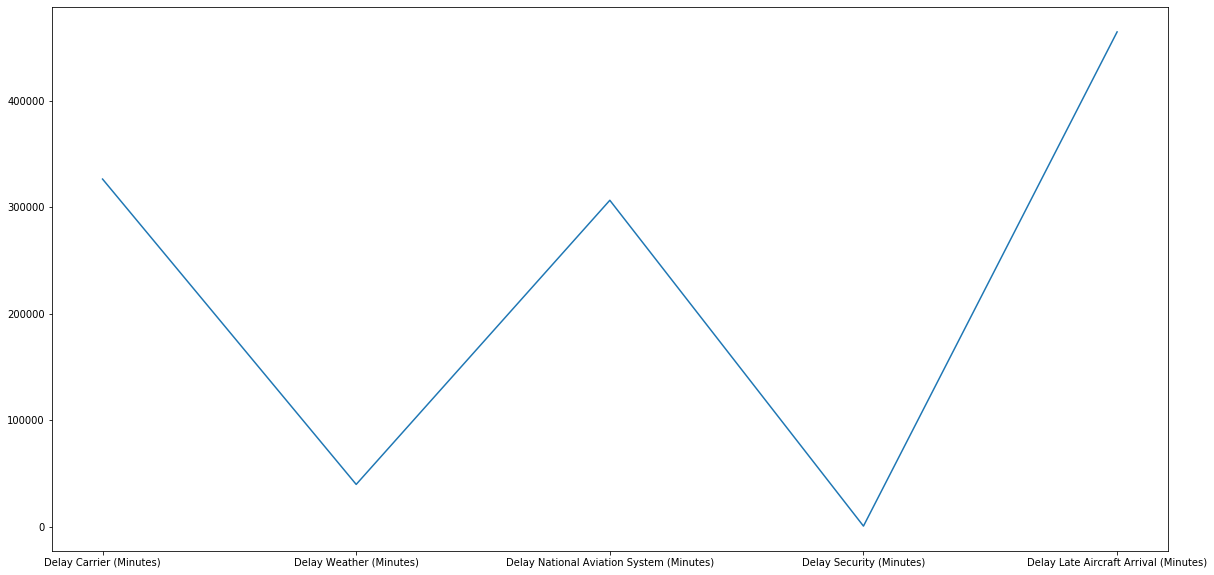

In [16]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,y_axis)

plt.savefig("delay_reason.png")

Is there any relationship between delay carrier and delay weather?

In [17]:
population1 = df1['Departure delay (Minutes)']

In [18]:
population2 = df1['Delay Weather (Minutes)']

In [19]:
df['Delay Weather (Minutes)'].sum()

39774.0

In [20]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=18.17733154547888, pvalue=3.1150556283413563e-64)

In [21]:
population3= df1['Delay Carrier (Minutes)']

In [22]:
df1['Delay Carrier (Minutes)'].sum()

326363.0

In [23]:
stats.ttest_ind(population1, population3, equal_var=False)

Ttest_indResult(statistic=12.6409572650841, pvalue=2.0570452392999057e-34)

In [24]:
population4= df1['Delay National Aviation System (Minutes)']

In [25]:
df['Delay National Aviation System (Minutes)'].sum()

306453.0

In [26]:
stats.ttest_ind(population1, population4, equal_var=False)

Ttest_indResult(statistic=12.924761024133371, pvalue=7.69980398239751e-36)

In [27]:
population5= df1['Delay Late Aircraft Arrival (Minutes)']

In [28]:
df1['Delay Late Aircraft Arrival (Minutes)'].sum()

464483.0

In [29]:
stats.ttest_ind(population1, population5, equal_var=False)

Ttest_indResult(statistic=9.416429145510033, pvalue=1.6616238816787453e-20)

In [30]:
df1['Delay Security (Minutes)'].sum()

650.0

In [31]:
stats.f_oneway(population2,population3,population4,population5)

F_onewayResult(statistic=87.55781788857392, pvalue=7.11227407940007e-55)

In [32]:
df.count()

Date (MM/DD/YYYY)                           13691
Destination Airport                         13691
Scheduled elapsed time (Minutes)            13691
Actual elapsed time (Minutes)               13691
Departure delay (Minutes)                   13691
Delay Carrier (Minutes)                     13691
Delay Weather (Minutes)                     13691
Delay National Aviation System (Minutes)    13691
Delay Security (Minutes)                    13691
Delay Late Aircraft Arrival (Minutes)       13691
Date                                        13691
dtype: int64

In [33]:
y=df['Departure delay (Minutes)']

In [34]:
x=df['Delay Weather (Minutes)']

In [35]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

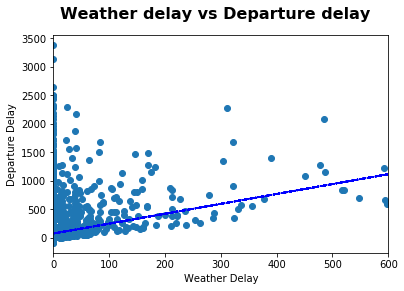

In [36]:
fig, ax = plt.subplots()

fig.suptitle("Weather delay vs Departure delay", fontsize=16, fontweight="bold")
ax.set_xlim(0, 600)

ax.set_xlabel("Weather Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.show()

In [37]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-41.84226708826851, pvalue=0.0)

In [38]:
x1=df['Delay Carrier (Minutes)']

In [39]:
(slope, intercept, _, _, _) = linregress(x1, y)
fit1 = slope * x1 + intercept

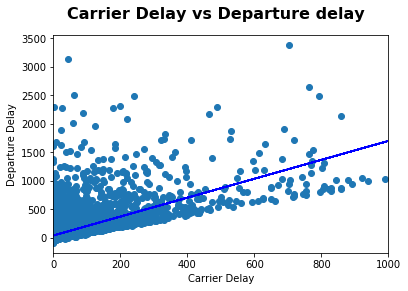

In [40]:
fig, ax = plt.subplots()

fig.suptitle("Carrier Delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1000)

ax.set_xlabel("Carrier Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x1, y, linewidth=0, marker='o')
ax.plot(x1, fit1, 'b--')

plt.show()

In [41]:
stats.ttest_ind(x1, y, equal_var=False)

Ttest_indResult(statistic=-28.343525231127497, pvalue=6.3958450282219035e-173)

In [42]:
x2=df['Delay National Aviation System (Minutes)']

In [43]:
(slope, intercept, _, _, _) = linregress(x2, y)
fit2 = slope * x2 + intercept

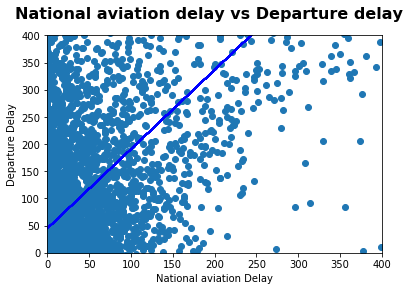

In [44]:
fig, ax = plt.subplots()

fig.suptitle("National aviation delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)

ax.set_xlabel("National aviation Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x2, y, linewidth=0, marker='o')
ax.plot(x2, fit2, 'b--')

plt.show()

In [45]:
stats.ttest_ind(x2, y, equal_var=False)

Ttest_indResult(statistic=-28.80167887199054, pvalue=1.6855804455710752e-178)

In [46]:
x3=df['Delay Late Aircraft Arrival (Minutes)']

In [47]:
(slope, intercept, _, _, _) = linregress(x3, y)
fit3 = slope * x3 + intercept

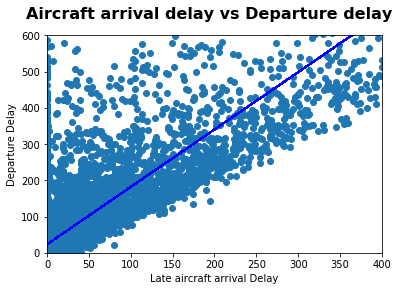

In [48]:
fig, ax = plt.subplots()

fig.suptitle("Aircraft arrival delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 600)

ax.set_xlabel("Late aircraft arrival Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x3, y, linewidth=0, marker='o')
ax.plot(x3, fit3, 'b--')

plt.show()

In [49]:
stats.ttest_ind(x3, y, equal_var=False)

Ttest_indResult(statistic=-22.130974036183705, pvalue=3.013824088613758e-107)

In [50]:
x4=df['Delay Security (Minutes)']

In [51]:
(slope, intercept, _, _, _) = linregress(x4, y)
fit4 = slope * x4 + intercept

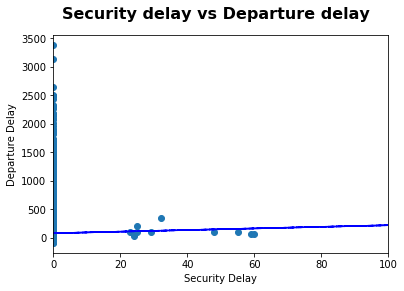

In [52]:
fig, ax = plt.subplots()

fig.suptitle("Security delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 100)

ax.set_xlabel("Security Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x4, y, linewidth=0, marker='o')
ax.plot(x4, fit4, 'b--')

plt.show()